# Problema da Mochila


### Solução por Força Bruta

In [6]:
# Declarando Bibliotecas
import random
from itertools import combinations
import time
import matplotlib.pyplot as plt

In [3]:
# Quantidade total de items
num_items15 = 15

In [4]:
# Capacidade da mochila
sack_capacity = 50

In [7]:
# Atribuindo pesos para cada item randomicamente

def generateItems(num_items):
    items = [
        {'weight': random.randint(1,20), 'value': random.randint(10, 100)}
        for _ in range(num_items)
    ]
    return items
    

items15 = generateItems(num_items15)

In [8]:
#Printando os itens
for i, item in enumerate(items15):
    print(f'Item {i + 1}: {item}')

Item 1: {'weight': 14, 'value': 46}
Item 2: {'weight': 2, 'value': 95}
Item 3: {'weight': 18, 'value': 29}
Item 4: {'weight': 9, 'value': 45}
Item 5: {'weight': 10, 'value': 55}
Item 6: {'weight': 5, 'value': 44}
Item 7: {'weight': 15, 'value': 68}
Item 8: {'weight': 16, 'value': 93}
Item 9: {'weight': 4, 'value': 48}
Item 10: {'weight': 9, 'value': 38}
Item 11: {'weight': 15, 'value': 72}
Item 12: {'weight': 10, 'value': 92}
Item 13: {'weight': 12, 'value': 69}
Item 14: {'weight': 13, 'value': 63}
Item 15: {'weight': 8, 'value': 19}


#### Algoritmo de Força Bruta

In [32]:
def knapsack_brute_force(items, capacity):

    start = time.time() # Registra o tempo de execução

    n = len(items)
    best_value = 0
    best_combination = None
    used_capacity = None
    
    for r in range(n + 1): #Quantidade de elementos na combinação
        for combination in combinations(items, r): #Combinação de r itens
            total_weight = sum(item['weight'] for item in combination)
            total_value = sum(item['value'] for item in combination)
            if total_weight <= capacity and total_value > best_value:
                best_value = total_value
                best_combination = combination
                used_capacity = total_weight

    end = time.time() - start # Coleta o tempo de execução

    return best_value, best_combination, used_capacity, end

In [33]:
# Função para printar os resultados

def showResults(value, combination, capacity, time, items):
    for item in combination:
        index = items.index(item)
        print(index, end=' ')
    print(f'\nValor Final: {value}\nCapacidade Final: {capacity}\nTempo Total: {time:.4f} s')
    return time

In [34]:
# Exibe resultados
times = []

times.append(showResults(*knapsack_brute_force(items15, sack_capacity), items15))

1 5 7 8 11 12 
Valor Final: 441
Capacidade Final: 49
Tempo Total: 0.0665 s


### Introduzindo novos items na mochila

20 Itens

In [45]:
# 20 Itens 
items20 = generateItems(20)
times.append(showResults(*knapsack_brute_force(items20, sack_capacity), items20))

0 6 7 12 15 17 19 
Valor Final: 558
Capacidade Final: 48
Tempo Total: 1.4579 s


22 Itens

In [52]:
# 22 Itens 
items22 = generateItems(22)
times.append(showResults(*knapsack_brute_force(items22, sack_capacity), items22))

0 1 6 9 10 11 12 13 15 17 18 
Valor Final: 723
Capacidade Final: 50
Tempo Total: 5.8492 s


24 Itens

In [66]:
# 24 Itens 
items24 = generateItems(24)
times.append(showResults(*knapsack_brute_force(items24, sack_capacity), items24))

0 4 6 14 17 22 
Valor Final: 496
Capacidade Final: 50
Tempo Total: 25.0041 s


26 Itens 

In [99]:
# 26 Itens 
items26 = generateItems(26)
times.append(showResults(*knapsack_brute_force(items26, sack_capacity), items26))

2 6 7 12 14 15 20 21 25 
Valor Final: 625
Capacidade Final: 50
Tempo Total: 119.3740 s


30 Itens

In [16]:
# 30 Itens 
items30 = generateItems(30)
times.append(showResults(*knapsack_brute_force(items30, sack_capacity), items30))

3 5 8 10 11 19 20 21 23 26 29 
Valor Final: 690
Capacidade Final: 48
Tempo Total: 2039.9150 s


### Plotando os gráficos

In [ ]:
#Inserindo valores de 15 itens
num_items = [15, 20, 22, 24, 26, 30]

print(times)
print(num_items)

[0.053148508071899414, 1.9219977855682373, 7.031814813613892, 28.909322500228882, 119.29092073440552, 2039.915034532547]
[15, 20, 22, 24, 26, 30]


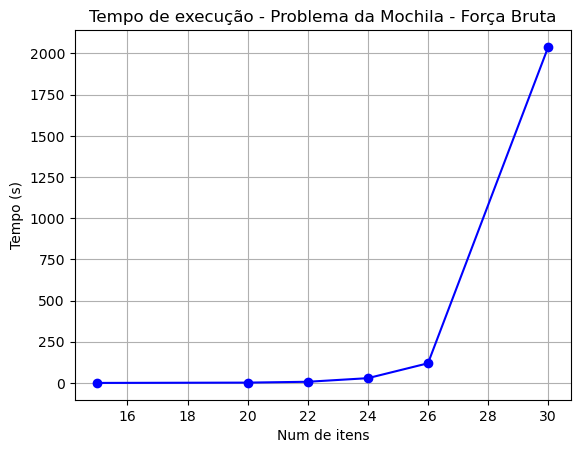

In [21]:
# Função de plotar
plt.plot(num_items, times, marker='o', linestyle='-', color='b', label='Line 1')

#Definindo titulo e legendas
plt.xlabel('Num de itens')
plt.ylabel('Tempo (s)')
plt.title('Tempo de execução - Problema da Mochila - Força Bruta')
plt.grid(True)

## Solução por Algoritmo Genético

**Tamanho da população**: 100

**Forma de Seleção**: Rank Selection + Roulette Whell Selection

**Tipo de Crossover**: Uniform Crossover + Two-Point Crossover

**Número de Gerações**: 10 * NUM_ITEMS

**Taxa de Mutação**: 5%

**Taxa de Crossover**: 80%



In [70]:
# Parametros iniciais
NUM_ITEMS = 15
POP_SIZE = 100
CAPACITY = 50
CROSSOVER_RATE = 0.8
DIVISION_NUM = 2
MUTATION_RATE = 0.05
ELITE_RATE = 0.01
GENERATION_NUM = 100

In [71]:
# Gera os itens de teste
items = generateItems(NUM_ITEMS)

In [72]:
for i, item in enumerate(items):
    print(f'Item {i + 1}: {item}')

Item 1: {'weight': 8, 'value': 71}
Item 2: {'weight': 17, 'value': 67}
Item 3: {'weight': 19, 'value': 12}
Item 4: {'weight': 15, 'value': 55}
Item 5: {'weight': 9, 'value': 59}
Item 6: {'weight': 2, 'value': 10}
Item 7: {'weight': 2, 'value': 43}
Item 8: {'weight': 16, 'value': 91}
Item 9: {'weight': 20, 'value': 37}
Item 10: {'weight': 19, 'value': 29}
Item 11: {'weight': 8, 'value': 23}
Item 12: {'weight': 2, 'value': 97}
Item 13: {'weight': 18, 'value': 15}
Item 14: {'weight': 7, 'value': 35}
Item 15: {'weight': 15, 'value': 28}


In [73]:
# Definição da população inicial (binaria)

def generateIndividual(items):
    return [random.randint(0, 1) for _ in range(len(items))]

# Inicialização da população
def generatePopulation(items):
    return [generateIndividual(items) for _ in range(POP_SIZE)]

In [74]:
population = generatePopulation(items)

population

[[1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0],
 [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1],
 [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0],
 [1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0],
 [0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0],
 [0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0],
 [0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1],
 [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1],
 [1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0],
 [0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1],
 [1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0],
 [0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1],
 [1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1],
 [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,

### Avalição de cada indivíduo

In [75]:
#Função de avaliação (fitness)

def fitness(individual, items):
    total_weight = total_value = 0
    #Percorre o cromossomo do indivíduo
    for gene, item in zip(individual, items):
        #Se o bit for igual a 1, o item será incluído na mochila
        if gene:
            #Calcula o peso e o valor
            total_weight += item['weight']
            total_value += item['value'] 
        # Se excedeu a capacidade máxima
        if total_weight > CAPACITY:
            return 0 # Penalização
    #Quanto maior o valor, melhor o fitness
    return total_value

In [76]:
# Salva o cada individuo com seu valor fitness associado em uma tupla
evaluated_population = [(individual, fitness(individual, items)) for individual in population]

evaluated_population

[([1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0], 0),
 ([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1], 0),
 ([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0], 0),
 ([1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0], 0),
 ([0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1], 0),
 ([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0], 0),
 ([0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1], 0),
 ([1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0], 0),
 ([0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1], 0),
 ([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0], 291),
 ([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1], 0),
 ([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1], 251),
 ([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1], 86),
 ([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0], 0),
 ([0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1], 0),
 ([1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0], 0),
 ([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0], 0),
 ([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1], 0),
 ([1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,

### Seleção dos indivíduos


In [77]:
# Função de rankeamento 

def rankAssignment(evaluated_population):
    # Ordena a população por ordem cresente de fitness
    evaluated_population = sorted(evaluated_population, key=lambda x: x[1])

    # Atribui o valor de ranking para cada individu0
    # Sendo menor_fitness = 0 e maior_fitness = POP_SIZE
    ranked_population  = [(ind[0], ind[1], rank)for rank , ind in enumerate(evaluated_population)]

    return ranked_population

In [78]:
ranked_population = rankAssignment(evaluated_population)
ranked_population

[([1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0], 0, 0),
 ([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1], 0, 1),
 ([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0], 0, 2),
 ([1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0], 0, 3),
 ([0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1], 0, 4),
 ([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0], 0, 5),
 ([0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1], 0, 6),
 ([1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0], 0, 7),
 ([0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1], 0, 8),
 ([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1], 0, 9),
 ([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0], 0, 10),
 ([0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1], 0, 11),
 ([1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0], 0, 12),
 ([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0], 0, 13),
 ([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1], 0, 14),
 ([1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1], 0, 15),
 ([0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0], 0, 16),
 ([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,

In [79]:
# Função de seleção

def rankSelection(ranked_population):
    # Gera valores entre 0 e 1
    offset = random.random()
    sum = 0

     # Cria a fatia POP_SIZE(POP_SIZE + 1)/2
    population_size = len(ranked_population) 
    slice = (population_size*(population_size + 1))/2

    # Seleciona um valor que possui a soma acumulativa maior que o valor random
    for individual in ranked_population:
        sum += (individual[2] + 1)/slice 
        if sum >= offset:
            return individual

In [80]:
selectedInd1 = rankSelection(ranked_population)
selectedInd2 = rankSelection(ranked_population)

print(f'Individuo 1: {selectedInd1}\nIndividuo 2: {selectedInd2}')


Individuo 1: ([1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0], 0, 27)
Individuo 2: ([0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1], 0, 73)


### Crossovers

Para melhor variabilidade, utilizaremos o Uniform Crossover durante as primeira gerações e, no final, o Multi-Point Crossover

In [81]:
# Recombinação Uniforme - Utilizado nas primeiras gerações
def uniformCrossover(parent1, parent2):
    child = []

    # Escolhe de maneira aleatoria o bit de um dos pais para cada item da mochila
    for i in range(len(parent1[0])):
        gene = random.choice([parent1[0][i], parent2[0][i]])
        child.append(gene)

    return child

In [82]:
# Recombinação de Multiplos Pontos
# Aplica-se a divisão de dois pontos
def multiPointCrossover(parent1, parent2):

    child1 = []
    child2 = []

    # Define o tamanho do segmento baseado no numero de divisoes 
    segment_size = NUM_ITEMS//DIVISION_NUM
    

    for i in range(DIVISION_NUM):

        # Itera pelas divisoes alternando os segmentos de cada pai nos filhos
        start = i*segment_size
        end = start + segment_size if i != DIVISION_NUM - 1 else NUM_ITEMS  # Muda ao chegar no fim da lista

        # Logica para a alternância
        if i%2 == 0:
            child1.extend(parent1[0][start:end])
            child2.extend(parent2[0][start:end])
        else:
            child1.extend(parent2[0][start:end])
            child2.extend(parent1[0][start:end])
    
    # retorna os filhos
    return child1, child2


In [83]:
# Criando filhos com a Recombinação Uniforme 

child1 = uniformCrossover(selectedInd1, selectedInd2)
child2 = uniformCrossover(selectedInd1, selectedInd2)

print(f'Filho 1: {child1}\nFilho 2: {child2}')

Filho 1: [0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0]
Filho 2: [1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0]


In [84]:
# Criando filhos com a Recombinação de Multiplos Pontos

child1, child2 = multiPointCrossover(selectedInd1, selectedInd2)

print(f'Filho 1: {child1}\nFilho 2: {child2}')

Filho 1: [1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1]
Filho 2: [0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0]


### Mutação

In [85]:
# A partir da taxa de mutação, é avaliado se o indivíduo sofre mutação

def bitFlipMutation(individual):
    # Avalia cada bit do filho
    for i in range(len(individual)):
        if random.random() < MUTATION_RATE: # Se menor que a taxa, realiza a mutação
            individual[i] = 1 - individual[i] # Realiza o flip do bit
    return individual

In [86]:
print(f'Filho antes da mutação: {child1}')
child1 = bitFlipMutation(child1)
print(f'Filho depois da mutação: {child1}')

print(f'Filho antes da mutação: {child2}')
child2 = bitFlipMutation(child2)
print(f'Filho depois da mutação: {child2}')

Filho antes da mutação: [1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1]
Filho depois da mutação: [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1]
Filho antes da mutação: [0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0]
Filho depois da mutação: [0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0]


### O Algoritmo Genético

In [87]:
# Realização de GENARATION_NUM iterações
def geneticAlgorithm(items):

    start = time.time() # Registra o tempo de execução

    # Listas para salvar estatisticas sobre os fitness de cada geração
    best_fitness_per_generation = []
    worst_fitness_per_generation = []
    avg_fitness_per_generation = []

    # Gera a população inicial
    population = generatePopulation(items)

    for i in range(GENERATION_NUM):


        # ======== FASE DE AVALIAÇÃO ============

        # Salva o cada individuo com seu valor fitness associado em uma tupla
        evaluated_population = [(individual, fitness(individual, items)) for individual in population]
        
        # Encontra o melhor fitness da atual geração e a média de fitness
        fitness_values = [ind[1] for ind in evaluated_population]
        best_fitness = max(fitness_values)
        worst_fitness = min(fitness_values)
        avg_fitness = sum(fitness_values)/ len(fitness_values)

        # Salva esses valores
        best_fitness_per_generation.append(best_fitness)
        worst_fitness_per_generation.append(worst_fitness)
        avg_fitness_per_generation.append(avg_fitness)

        # ======== FASE DE SELEÇÃO ==============

        # Realiza o rankeamento da população
        ranked_population = rankAssignment(evaluated_population)

        # Realiza o tecnica de elitismo
        elite_size = int(ELITE_RATE * POP_SIZE)
        elite_group = ranked_population[-elite_size:] # Separa o grupo com menor fitness
        # Remonta a lista sem o elite_group
        ranked_population = ranked_population[:-elite_size]

        # Lista que armazena a nova populacao
        new_population = []

        while len(new_population) < POP_SIZE - elite_size:

            # Realiza a seleção de dois individuos para o crossover
            parent1 = rankSelection(ranked_population)
            parent2 = rankSelection(ranked_population)

        # ============== FASE DE CROSSOVER ===========

            # Decide qual tipo de crossover realizar
            if i < int(GENERATION_NUM * 0.5):
                child1 = uniformCrossover(parent1, parent2)
                child2 = uniformCrossover(parent1, parent2)

            else:
                child1, child2 = multiPointCrossover(parent1, parent2)

            # Realiza as possiveis mutações
            child1 = bitFlipMutation(child1)
            child2 = bitFlipMutation(child2)

            # Adiciona os filhos à nova população
            new_population.append(child1)
            if len(new_population) < POP_SIZE - elite_size:
                new_population.append(child2)
            
        # ============== CONCEPÇÃO DA NOVA GERAÇÃO =======
        for elite in elite_group:
            new_population.append(elite[0])
        population = new_population

    # Raliza o teste de fitness uma ultima vez para pegar o melhor resultado
    evaluated_population = [(individual, fitness(individual, items)) for individual in population]
    best_individual = max(evaluated_population, key=lambda x: x[1])

    end = time.time() - start # Coleta o tempo de execução

    return best_individual, best_fitness_per_generation, worst_fitness_per_generation, avg_fitness_per_generation, end
        

### Realizando testes

In [88]:
# Função para printar resultados

def showResultsGA(best_individual, finalTime):
    print('Combinacao Final:', end=' ')
    for index, gene in enumerate(best_individual[0]):
        if gene == 1:
            print(index, end=' ')
    print(f'\nValor Final: {best_individual[1]}\nTempo Final : {finalTime:.4f}')


In [89]:
# Função para gerar gráfico de avalição

def plotGraph(best_fitness, worst_fitness, avg_fitness):

    generations = list(range(len(avg_fitness)))
    avg = avg_fitness
    max_ = best_fitness
    min_ = worst_fitness

    plt.figure(figsize=(10, 6))

    # Plotando valor maximo
    plt.plot(generations, max_, 'r-*', label='Max')

    # Plotando valor minimo
    plt.plot(generations, min_, 'b-^', label='Min')

    # Plotando valor medio
    plt.plot(generations, avg, 'k->', label='Avg')


    plt.xlabel('Times')
    plt.ylabel('Function fitness')
    plt.title('Fitness over Generations')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

15 Itens

Combinacao Final: 1 5 7 8 11 12 
Valor Final: 441
Tempo Final : 0.1103


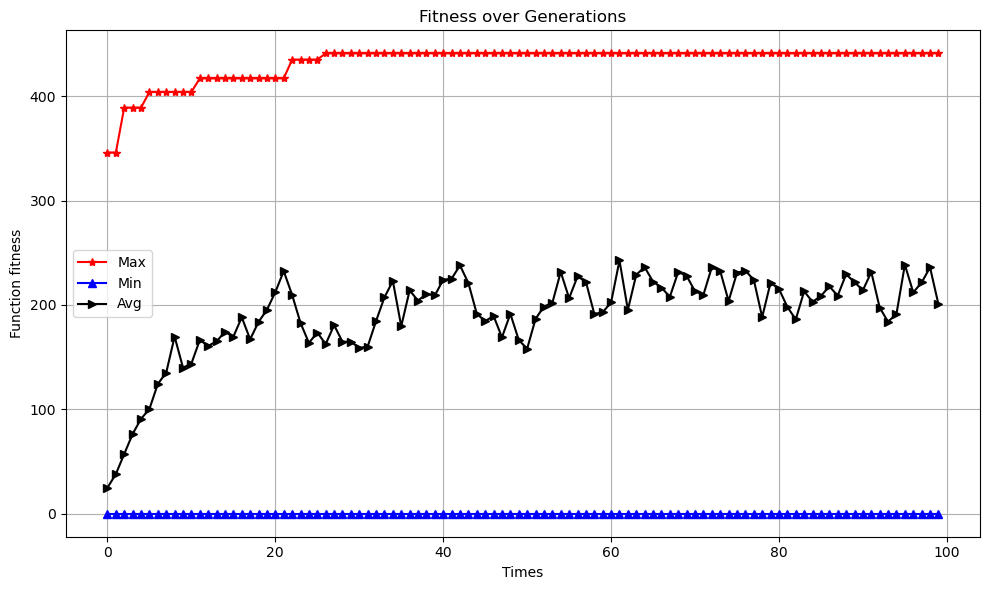

In [90]:
# Teste com 15 itens
best_individual15, best_fiteness_generation15, worst_fitness_per_generation15, avg_fitness_per_generation15, finalTime15 = geneticAlgorithm(items15)

# Printando resultados
showResultsGA(best_individual15, finalTime15)

# Gerando grafico
plotGraph(best_fiteness_generation15, worst_fitness_per_generation15, avg_fitness_per_generation15)

20 Itens

Número de gerações = 200

In [91]:
GENERATION_NUM = 200

Combinacao Final: 0 6 7 12 15 17 19 
Valor Final: 558
Tempo Final : 0.2442


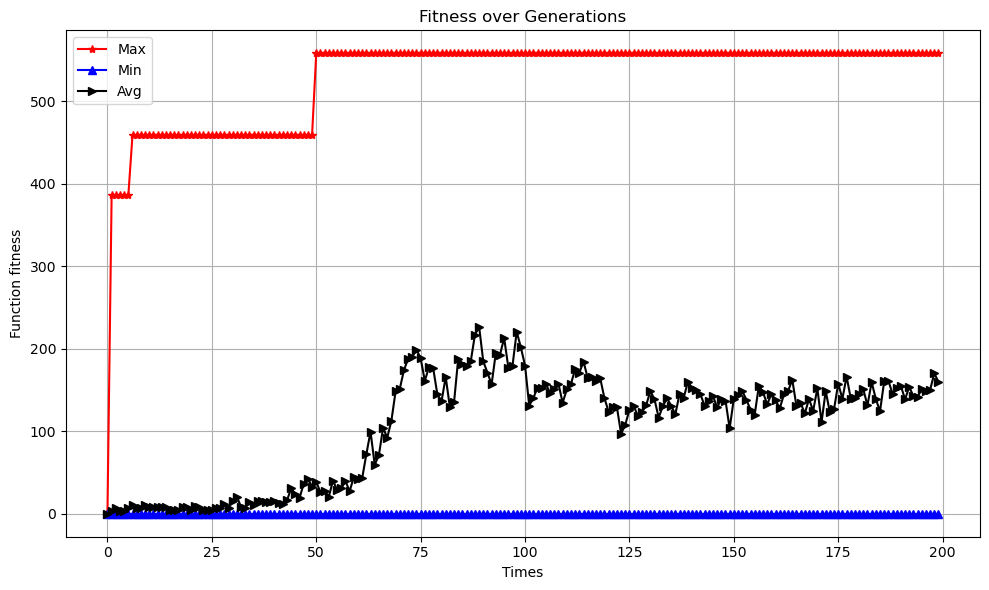

In [92]:
# Teste com 20 itens
best_individual20, best_fiteness_generation20, worst_fitness_per_generation20, avg_fitness_per_generation20, finalTime20 = geneticAlgorithm(items20)

# Printando resultados
showResultsGA(best_individual20, finalTime20)

# Gerando grafico
plotGraph(best_fiteness_generation20, worst_fitness_per_generation20, avg_fitness_per_generation20)

22 Itens

Número de gerações = 220

In [93]:
GENERATION_NUM = 220

Combinacao Final: 0 1 6 9 10 11 12 13 15 17 20 
Valor Final: 723
Tempo Final : 0.2610


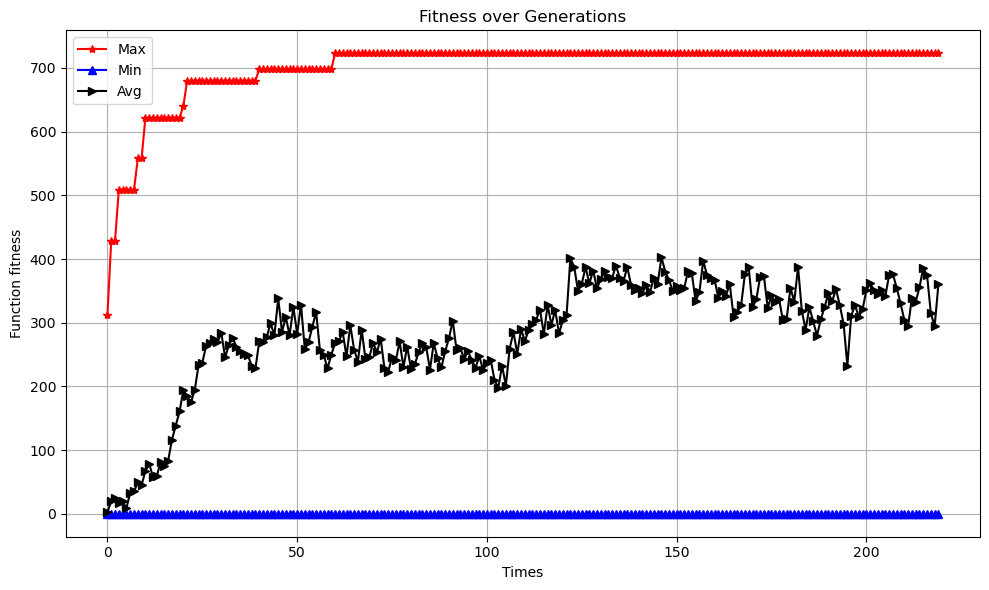

In [94]:
# Teste com 22 itens
best_individual22, best_fiteness_generation22, worst_fitness_per_generation22, avg_fitness_per_generation22, finalTime22 = geneticAlgorithm(items22)

# Printando resultados
showResultsGA(best_individual22, finalTime22)

# Gerando grafico
plotGraph(best_fiteness_generation22, worst_fitness_per_generation22, avg_fitness_per_generation22)

24 Itens

Número de gerações = 240

In [95]:
GENERATION_NUM = 240

Combinacao Final: 2 4 5 6 14 
Valor Final: 387
Tempo Final : 0.3088


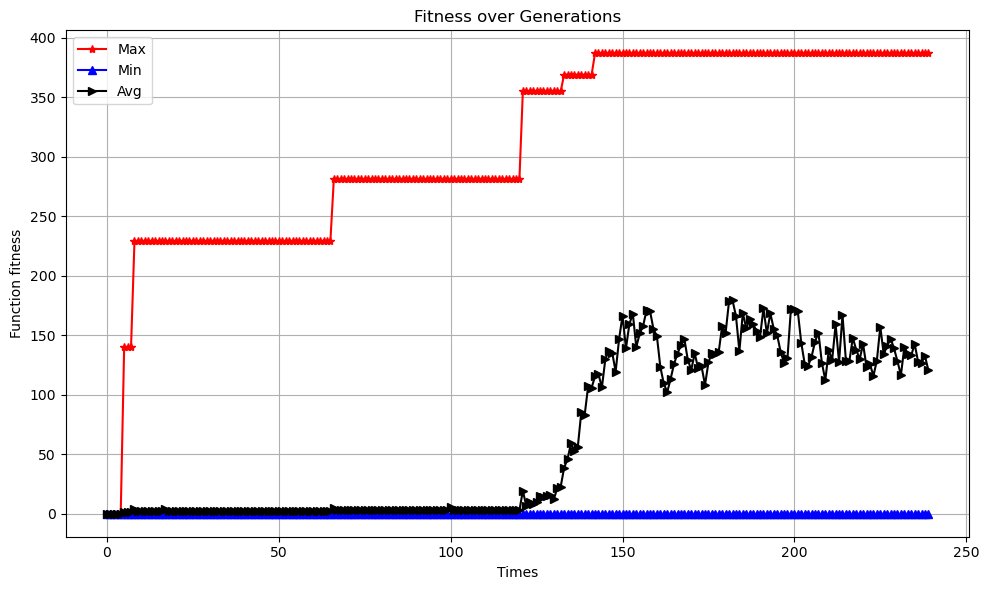

In [96]:
# Teste com 24 itens
best_individual24, best_fiteness_generation24, worst_fitness_per_generation24, avg_fitness_per_generation24, finalTime24 = geneticAlgorithm(items24)

# Printando resultados
showResultsGA(best_individual24, finalTime24)

# Gerando grafico
plotGraph(best_fiteness_generation24, worst_fitness_per_generation24, avg_fitness_per_generation24)

26 Itens

Número de gerações = 260

In [111]:
GENERATION_NUM = 260

Combinacao Final: 3 4 6 7 12 14 15 20 23 
Valor Final: 568
Tempo Final : 0.3321


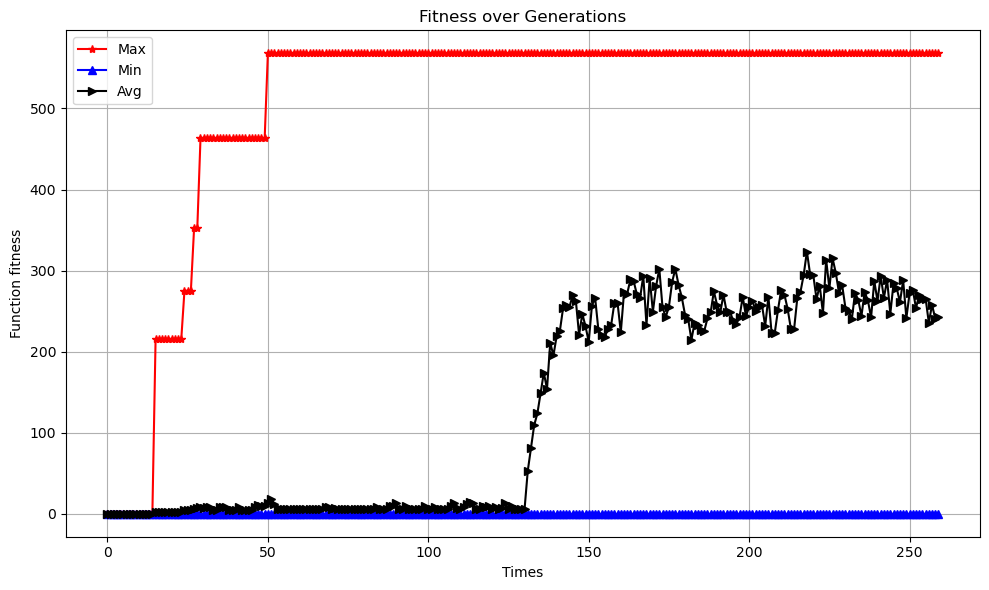

In [115]:
# Teste com 26 itens
best_individual26, best_fiteness_generation26, worst_fitness_per_generation26, avg_fitness_per_generation26, finalTime26 = geneticAlgorithm(items26)

# Printando resultados
showResultsGA(best_individual26, finalTime26)

# Gerando grafico
plotGraph(best_fiteness_generation26, worst_fitness_per_generation26, avg_fitness_per_generation26)

30 Itens

Número de gerações = 300

In [ ]:
GENERATION_NUM = 300

Combinacao Final: 0 3 10 11 13 19 21 26 
Valor Final: 511
Tempo Final : 0.4526


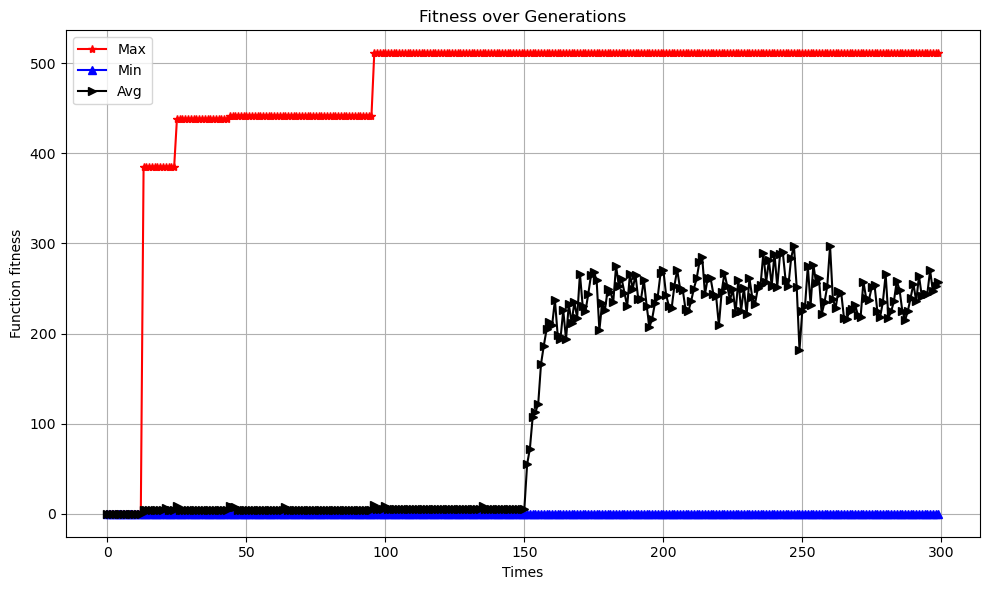

In [ ]:
# Teste com 30 itens
best_individual30, best_fiteness_generation30, worst_fitness_per_generation30, avg_fitness_per_generation30, finalTime30 = geneticAlgorithm(items30)

# Printando resultados
showResultsGA(best_individual30, finalTime30)

# Gerando grafico
plotGraph(best_fiteness_generation30, worst_fitness_per_generation30, avg_fitness_per_generation30)

### Como a taxa de mutação impacta na convergência do algoritmo?

MUTATION_RATE = 0.1

In [116]:
GENERATION_NUM = 200
MUTATION_RATE = 0.1

Combinacao Final: 2 3 7 15 17 18 19 
Valor Final: 513
Tempo Final : 0.2751


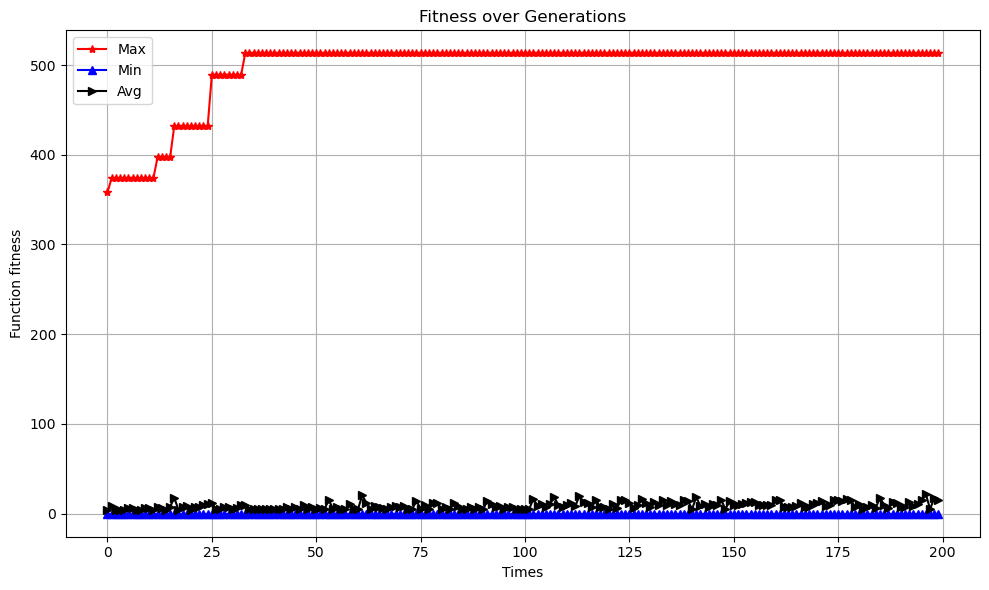

In [129]:
# Teste com 20 itens
best_individual20, best_fiteness_generation20, worst_fitness_per_generation20, avg_fitness_per_generation20, finalTime20 = geneticAlgorithm(items20)

# Printando resultados
showResultsGA(best_individual20, finalTime20)

# Gerando grafico
plotGraph(best_fiteness_generation20, worst_fitness_per_generation20, avg_fitness_per_generation20)

MUTATION_RATE = 0.5

In [118]:
MUTATION_RATE = 0.5

Combinacao Final: 0 5 7 12 15 18 
Valor Final: 468
Tempo Final : 0.2670


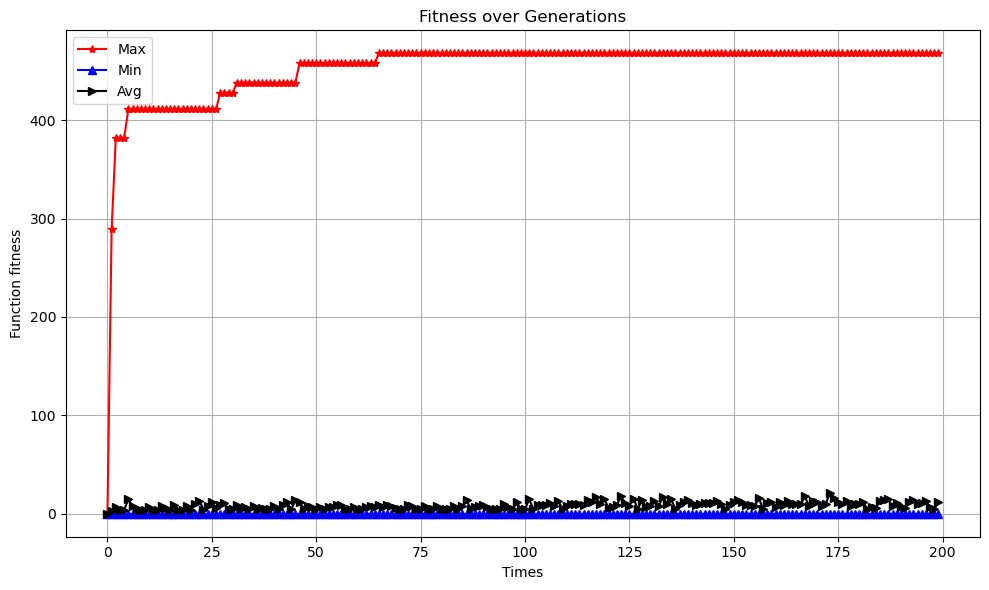

In [130]:
# Teste com 20 itens
best_individual20, best_fiteness_generation20, worst_fitness_per_generation20, avg_fitness_per_generation20, finalTime20 = geneticAlgorithm(items20)

# Printando resultados
showResultsGA(best_individual20, finalTime20)

# Gerando grafico
plotGraph(best_fiteness_generation20, worst_fitness_per_generation20, avg_fitness_per_generation20)

MUTATION_RATE = 1

In [131]:
MUTATION_RATE = 1

Combinacao Final: 6 7 12 15 17 18 19 
Valor Final: 491
Tempo Final : 0.2622


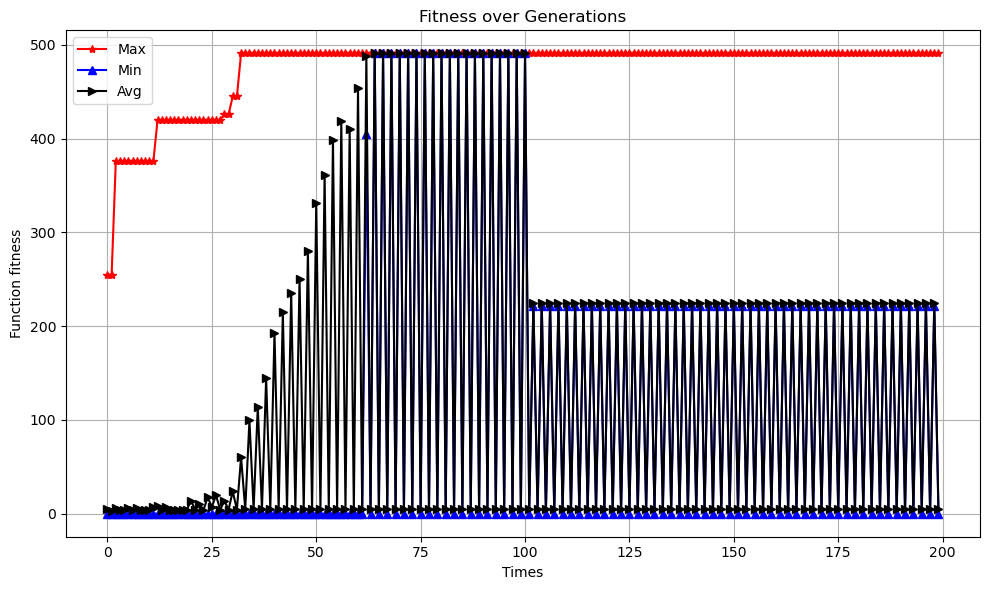

In [132]:
# Teste com 20 itens
best_individual20, best_fiteness_generation20, worst_fitness_per_generation20, avg_fitness_per_generation20, finalTime20 = geneticAlgorithm(items20)

# Printando resultados
showResultsGA(best_individual20, finalTime20)

# Gerando grafico
plotGraph(best_fiteness_generation20, worst_fitness_per_generation20, avg_fitness_per_generation20)

MUTATION_RATE = 0

In [133]:
MUTATION_RATE = 0

Combinacao Final: 0 5 7 12 18 19 
Valor Final: 442
Tempo Final : 0.2559


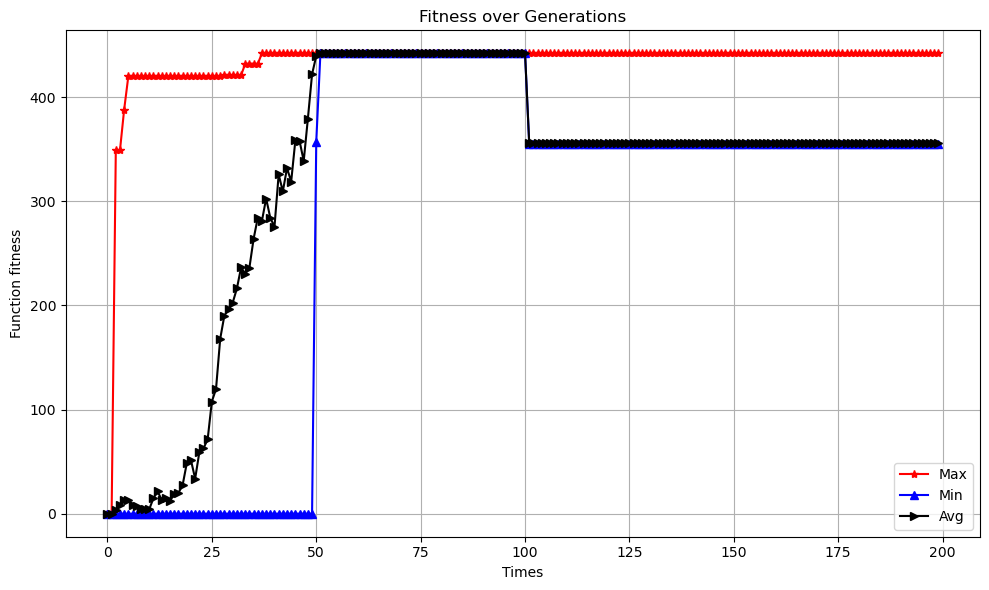

In [142]:
# Teste com 20 itens
best_individual20, best_fiteness_generation20, worst_fitness_per_generation20, avg_fitness_per_generation20, finalTime20 = geneticAlgorithm(items20)

# Printando resultados
showResultsGA(best_individual20, finalTime20)

# Gerando grafico
plotGraph(best_fiteness_generation20, worst_fitness_per_generation20, avg_fitness_per_generation20)

### CONCLUSÃO

Em casos onde a **mutação é baixa** (MUTATION_RATE < 0.05), o algoritmo genético é incapaz de explorar novas soluções. Dessa forma, a diversidade da poupulação é reduzida, chegando a casos em que ela é idêntica. Ou seja, o pior indivíduo é parecido com o melhor

*Consequência*: Fitness médio e mínimo ficam próximos ao fitness máximo

Em casos onde a **mutação é alta**  (MUTATION_RATE > 0.1), o algotimo genético é incapaz de reter boas soluções. Dessa forma, a diversidade é alta, porém muito dispersa e fraca. 

*Consequência*: Baixo Fitness médio e mínimo 